In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

#노트북에 그래프를 그리기 위해
%matplotlib inline

#그래프 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

#그래프 한글 폰트 깨지는 문제 대처
# path = 'C:/Windows/Fonts/NanumGothic.ttf'
path = 'C:/Windows/Fonts/LGSmHaR.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
font = {'family' : font_name,
        'size'   : 16}
plt.rc('font', **font)

In [17]:
!pip install missingno

In [51]:
df = pd.read_csv('d:/data/lcl_17_18.txt', sep='\t', parse_dates = ["OB Date"])

C:\Users\user\AppData\Local\Continuum\anaconda364\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,66,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
df['Shipment Information_LCL'] = df['Shipment Information_LCL'].fillna(0)

In [52]:
df['Shipment Information_LCL'] = df['Shipment Information_LCL'].str.replace(',', '')

In [53]:
df['Shipment Information_LCL'] = df['Shipment Information_LCL'].astype('float64')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25883 entries, 0 to 25882
Data columns (total 99 columns):
year                                   25883 non-null int64
month                                  25883 non-null int64
OB Date                                25883 non-null datetime64[ns]
MBL No                                 25883 non-null object
SO No                                  25883 non-null object
HBL No                                 25883 non-null object
yn                                     0 non-null float64
EXEC Role                              25883 non-null object
Type                                   25883 non-null object
M.Term                                 25883 non-null object
M.Delivery Term_L.Term                 8425 non-null object
M.Delivery Term_D.Term                 8425 non-null object
Incoterms                              25883 non-null object
H.Term                                 8425 non-null object
H.Delivery Term_L.Term               

In [44]:
df["year"] = df["OB Date"].dt.year
df["month"] = df["OB Date"].dt.month
df["day"] = df["OB Date"].dt.day
df["week"] = df["OB Date"].dt.week
df["dayofweek"] = df["OB Date"].dt.dayofweek

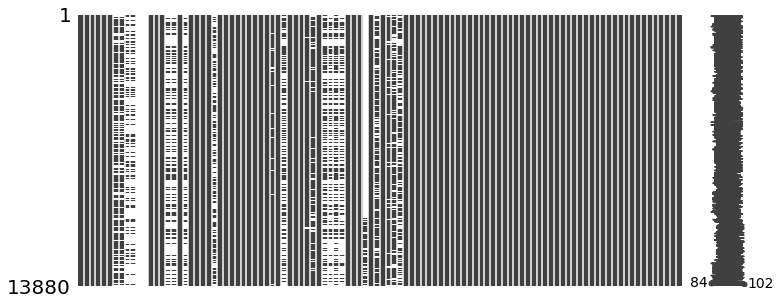

In [21]:
msno.matrix(df, figsize = (12,5))

In [7]:
df[~(~df['HBL No'].str.startswith('PLI') & df['M.Term'].str.match('CC'))] 

,OB Date,MBL No,SO No,HBL No,EXEC Role,Type,M.Term,M.Delivery Term_L.Term,M.Delivery Term_D.Term,Incoterms,...,Stage Profit_II Profit_per,Stage Profit_III Sales,Stage Profit_III Cost,Stage Profit_III Profit,Stage Profit_III Profit_per,year,month,day,week,dayofweek
0,2018-01-01,ESSASEL17122632,SHQF171200018542,PLIHQ5738894,EXP,NOR,PP,CFS,CFS,CIF,...,52.83,0,0,0,0,2018,1,1,1,0
1,2018-01-01,ESSASEL17122684,SHQF171200019483,PLIHQ5739003,EXP,NOR,PP,CFS,CFS,CIF,...,65.61,0,0,0,0,2018,1,1,1,0
2,2018-01-01,ESSASEL17122685,SHQF171200019489,PLIHQ5739005,EXP,NOR,PP,CFS,CFS,CIF,...,23.29,0,0,0,0,2018,1,1,1,0
3,2018-01-01,ESSASEL17122782,SHQF171200019786,PLIHQ5739341,EXP,NOR,PP,CFS,CFS,EXW,...,100.36,0,0,0,0,2018,1,1,1,0
4,2018-01-01,ESSASEL17122784,SHQF171200019961,PLIHQ5739382,EXP,NOR,PP,CFS,CFS,FOB,...,59.37,58.84,0,58.84,100,2018,1,1,1,0
5,2018-01-01,ESSASEL17122846,SHQF171200020030,PLIHQ5739439,EXP,NOR,PP,CFS,CFS,CIF,...,167.29,0,0,0,0,2018,1,1,1,0
6,2018-01-01,SKOR17004240,SHQF171200019191,PLIHQ5739422,EXP,NOR,PP,CFS,CFS,CIF,...,65.83,0,0,0,0,2018,1,1,1,0
7,2018-01-01,,SHQN171200004053,1712CN32712,EXP,NOR,PP,NaN,NaN,CIP,...,0,0,0,0,0,2018,1,1,1,0
9,2018-01-01,,SHQD180100000047,DHBL17120218,EXP,NOR,PP,NaN,NaN,CIP,...,9.35,0,0,0,0,2018,1,1,1,0
10,2018-01-01,,SHQD180100000048,DHBL17120219,EXP,NOR,PP,NaN,NaN,CIP,...,0,0,0,0,0,2018,1,1,1,0


In [56]:
print("건수 : {:,}  CBM : {:,}".format(df['Shipment Information_LCL'].count(),\
                                           round(df['Shipment Information_LCL'].sum())))

건수 : 16,384  CBM : 2,900,776.0


In [9]:
print("HBL CC 건수 : {:,}  CBM : {:,}".format(df[~(~df['HBL No'].str.startswith('PLI') & df['M.Term'].str.match('CC'))]['Shipment Information_LCL'].count(),\
                                           round(df[~(~df['HBL No'].str.startswith('PLI') & df['M.Term'].str.match('CC'))]['Shipment Information_LCL'].sum())))

HBL CC 건수 : 14,192  CBM : 77,669.0


In [10]:
# HBL CC 건 제외 처리
df = df[(~df['HBL No'].str.startswith('PLI') & df['M.Term'].str.match('CC'))]

In [11]:
print("건수 : {:,}  CBM : {:,}".format(df['Shipment Information_LCL'].count(),\
                                           df['Shipment Information_LCL'].sum()))

건수 : 2,192  CBM : 2,823,106.52


In [45]:
df_temp = df.groupby(['POL','POD','year','month','week'])['Shipment Information_LCL'].agg(['sum', 'mean','count']).reset_index()

In [46]:
# 값이 0 인 건 제외 처리
df_temp = df_temp[df_temp['sum'] != 0]

In [14]:
df_temp

,POL,POD,year,month,week,sum,mean,count
3,JPMOJ,JPHKT,2018,12,49,503.62,503.620000,1
4,JPMOJ,JPSHS,2017,8,33,161.25,161.250000,1
8,JPMOJ,JPSHS,2018,11,47,1105.61,1105.610000,1
9,JPSHS,JPSHS,2018,10,44,150.28,150.280000,1
10,JPSHS,JPSHS,2018,11,44,150.28,150.280000,1
12,KRCHO,KRPUS,2017,1,1,1.00,1.000000,1
13,KRCHO,KRPUS,2017,2,5,1.00,1.000000,1
14,KRICN,PLKYE,2017,9,36,102.48,102.480000,1
16,KRICN,UZTAS,2017,5,21,0.02,0.020000,1
18,KRINC,CNBJS,2017,4,15,1.96,1.960000,1


In [25]:
df_temp.groupby(['POL','POD','year'])['mean'].agg(['sum', 'mean','count']).reset_index().sort_values('count', ascending = False)

,POL,POD,year,sum,mean,count
76,KRPUS,CNXIP,2017,68.821774,1.678580,41
12,KRINC,CNWEI,2017,376.322833,9.408071,40
55,KRPUS,BRSSZ,2017,234.866667,6.347748,37
218,KRPUS,USLGB,2017,345.435833,10.794870,32
201,KRPUS,TWKEL,2017,89.660071,2.801877,32
105,KRPUS,HKHKG,2017,79.643333,2.488854,32
21,KRKAN,JPTYO,2017,32.285714,1.041475,31
191,KRPUS,THLCH,2017,119.159000,3.971967,30
68,KRPUS,CNSHA,2017,77.756667,2.591889,30
216,KRPUS,USLAX,2017,113.934167,3.928764,29


In [47]:
df_temp1 = df_temp.groupby(['POL','POD','year'])['mean'].agg(['sum', 'mean','count']).reset_index().sort_values('count', ascending = False)

In [49]:
df_temp1[df_temp1['sum'] > 800]

,POL,POD,year,sum,mean,count
541,KRPUS,USLAX,2017,1.058816e+03,2.036185e+01,52
593,UZBAK,UZTAS,2018,2.857130e+03,2.857130e+02,10
591,ROCND,KZAAU,2017,5.192960e+03,5.192960e+03,1
0,BGVAR,KZAAU,2017,1.625440e+03,1.625440e+03,1
80,KRMAS,IQUQR,2017,2.809281e+06,2.809281e+06,1
77,KRMAS,AEJEA,2017,1.139850e+03,1.139850e+03,1
10,JPMOJ,JPSHS,2018,1.105610e+03,1.105610e+03,1


In [48]:
df_temp1[df_temp1['count'] > 40]

,POL,POD,year,sum,mean,count
471,KRPUS,SGSIN,2017,267.080638,4.685625,57
176,KRPUS,CNSHA,2017,239.909031,4.284090,56
275,KRPUS,HKHKG,2017,215.408608,3.846582,56
287,KRPUS,IDTPP,2017,153.727992,2.900528,53
305,KRPUS,INNSA,2017,252.167528,4.757878,53
171,KRPUS,CNNKG,2017,194.478837,3.739978,52
580,KRPUS,VNSGN,2017,195.980397,3.768854,52
541,KRPUS,USLAX,2017,1058.816114,20.361848,52
196,KRPUS,CNXIP,2017,187.967565,3.685639,51
404,KRPUS,MYPKG,2017,231.860849,4.637217,50


In [84]:
df[df['year'] == 2018][df['month'] == 7]['Shipment Information_LCL']

C:\Users\user\AppData\Local\Continuum\anaconda364\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5811    0.0
5812    0.0
5813    0.0
5814    0.0
5815    0.0
5816    0.0
5817    0.0
5818    0.0
5819    0.0
5820    0.0
5821    0.0
5822    0.0
5823    0.0
5824    0.0
5825    0.0
5826    0.0
5827    0.0
5828    0.0
5829    0.0
5830    0.0
5831    0.0
5832    0.0
5833    0.0
5834    0.0
5835    0.0
5836    0.0
5837    0.0
5838    0.0
5839    0.0
5840    0.0
       ... 
6903    0.0
6904    0.0
6905    0.0
6906    0.0
6907    0.0
6908    0.0
6909    0.0
6910    0.0
6911    0.0
6912    0.0
6913    0.0
6914    0.0
6915    0.0
6916    0.0
6917    0.0
6918    0.0
6919    0.0
6920    0.0
6921    0.0
6922    0.0
6923    0.0
6924    0.0
6925    0.0
6926    0.0
6927    0.0
6928    0.0
6929    0.0
6930    0.0
6931    0.0
6932    0.0
Name: Shipment Information_LCL, Length: 1122, dtype: float64

In [58]:
df.groupby(['year','month'])['Shipment Information_LCL'].agg(['sum', 'mean','count']).reset_index()

,year,month,sum,mean,count
0,2017,1,4467.04,4.270593,1046
1,2017,2,7308.77,7.265179,1006
2,2017,3,11674.23,9.608420,1215
3,2017,4,5135.72,4.333941,1185
4,2017,5,5185.42,4.572681,1134
5,2017,6,5406.40,4.168389,1297
6,2017,7,5206.32,4.070618,1279
7,2017,8,11216.65,10.141637,1106
8,2017,9,4831.93,4.057036,1191
9,2017,10,4685.58,4.466711,1049


## 월별 물동량
### 월별 물동량 분석 결과 2월, 3월, 8월에 물동량이 크며, 편차또한 큰 것으로 나타남.

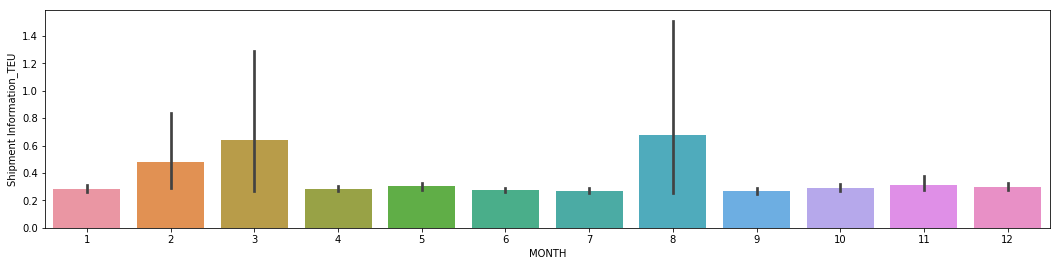

In [73]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(data = df, x = "MONTH", y = "Shipment Information_TEU", ax = ax1)

### 2월 고객 그룹별 물동량
- LG-Fashion의 물동량이 가장 많으며, 물량이 매우 큰 건이 포함되어 있음

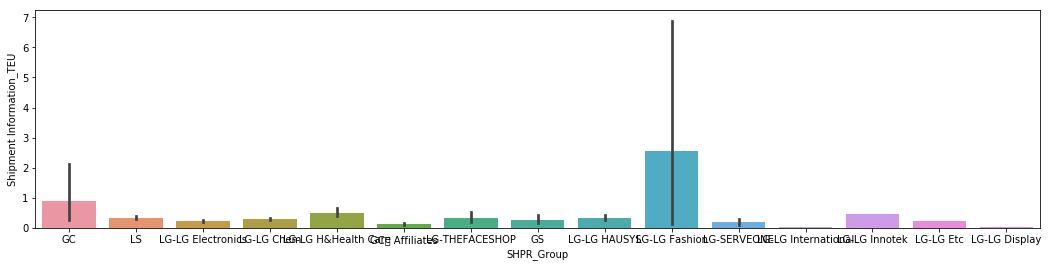

In [74]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(x="SHPR_Group", y="Shipment Information_TEU", data=df[df.MONTH == 2])

In [75]:
df[df.MONTH == 2].group_by

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

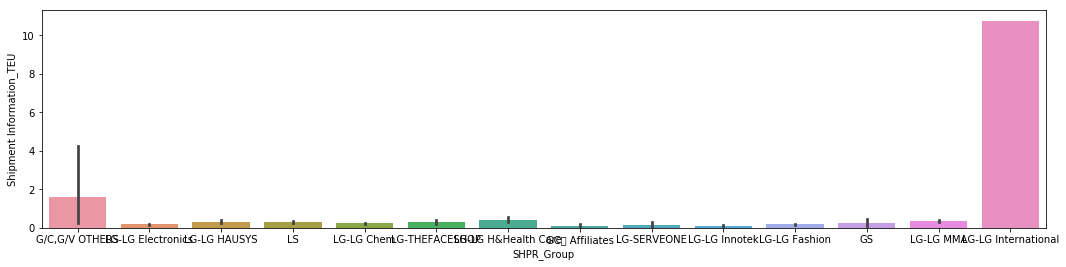

In [68]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(x="SHPR_Group", y="Shipment Information_TEU", data=df[df.MONTH == 8])

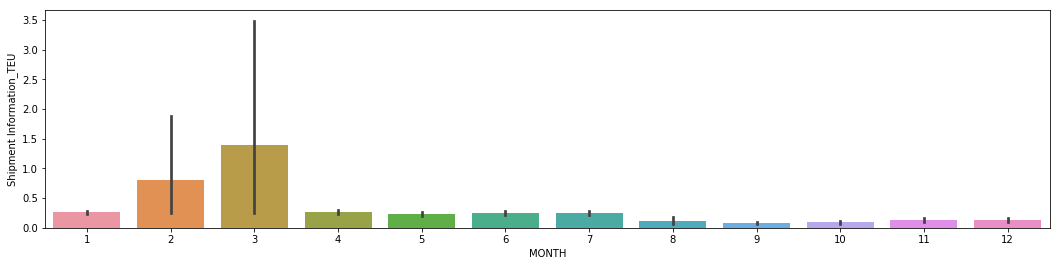

In [71]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(data = df[df.SHPR_Group.str.contains("GC")], x = "MONTH", y = "Shipment Information_TEU", ax = ax1)

ValueError: Could not interpret input 'SHPR_GROUP'

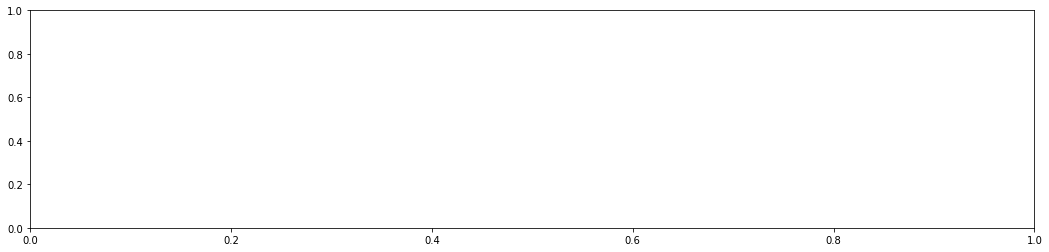

In [66]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(x="SHPR_GROUP", y="Shipment Information_TEU", data=df[df.MONTH == 8])

AttributeError: 'DataFrame' object has no attribute 'SHPR_GROUP'

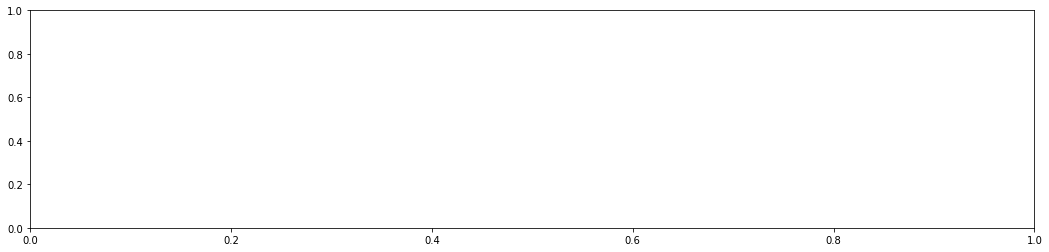

In [45]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)
sns.barplot(data = df[df.SHPR_GROUP == "GC"], x = "MONTH", y = "Shipment Information_TEU", ax = ax1)

In [51]:
df.SHPR_GROUP

AttributeError: 'DataFrame' object has no attribute 'SHPR_GROUP'